# WE11-Autoencoder

In this notebook, I've implemented an autoencoder for the MNIST dataset, adding new images that correspond to the initial letter of my name 'S'. The intention is to show how the new character and MNIST digits can be reconstructed using the autoencoder.

In [1]:
import numpy as np

## Load MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


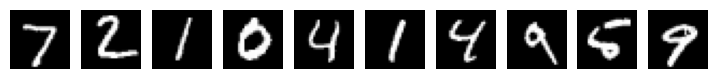

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load the supplied autoencoder

In [4]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### To evaluate the autoencoder model, recreate the test images and visually examine the outcomes by showing the predictions for multiple randomly selected digits and contrasting them with the originals:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


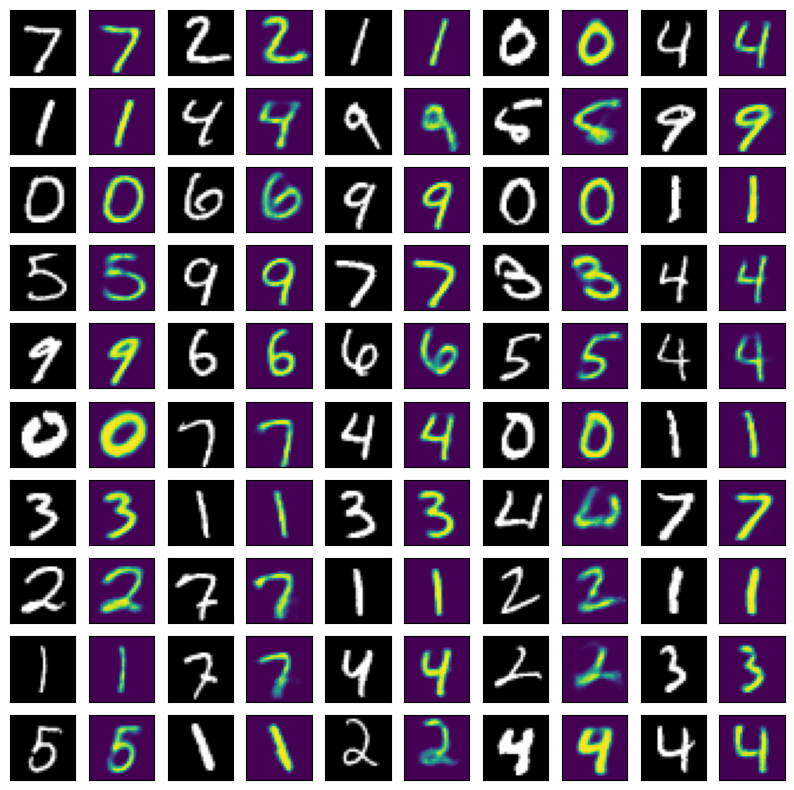

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Load new images
#### Here I am going load the 5 images that correspond to the initial letter of my name 'S' that I have created.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Load new images
new_images = []
for i in range(5):
    img = tf.keras.utils.load_img(f's{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array / 255.0  # Normalize between 0 and 1
    img_array = img_array.reshape(784)
    new_images.append(img_array)
    
new_images = np.array(new_images)

## Oversampling my images to make sure that model can identify my new character

In [8]:
# Oversample new images
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

oversampled_new_images = []
for img_array in new_images:
    img = img_array.reshape((1, 28, 28, 1))  # Add batch dimension
    for _ in range(500):
        augmented_img = datagen.flow(img, batch_size=1)[0][0]
        oversampled_new_images.append(augmented_img.reshape(784))

oversampled_new_images = np.array(oversampled_new_images)

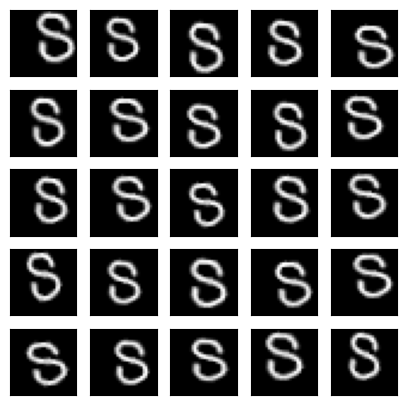

In [9]:
#lets have a look at the oversampled new images
images = []
for i in range(25):
    images.append(oversampled_new_images[i].reshape(28,28))
rows = 5
cols = 5
plt.figure(figsize=(5,5))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i],cmap='gray')

plt.show()

In [10]:
# Combine the original and oversampled new images
combined_images = np.concatenate((train_images, oversampled_new_images), axis=0)

### Implementing a new autoencoder and using the MNIST dataset along with the uploaded photos to train it.

In [11]:
# Define the autoencoder architecture
input_dim = 28*28
latent_vec_len = 16  # This is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# Build the encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(500, activation='relu')(input_layer)
encoder = Dense(300, activation='relu')(encoder)
encoder = Dense(100, activation='relu')(encoder)

# The bottleneck layer
latent_vec = Dense(latent_vec_len, activation='relu')(encoder)

# Build the decoder
decoder = Dense(100, activation='relu')(latent_vec)
decoder = Dense(300, activation='relu')(decoder)
decoder = Dense(500, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [12]:
# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,800 (4.39 MB)

 Trainable params: 1,149,800 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=combined_images, # For autoencoders, both the input and the target are the same
    y=combined_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)

Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2612 - val_loss: 0.1358
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1357 - val_loss: 0.1206
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1218 - val_loss: 0.1137
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1133 - val_loss: 0.1066
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1081 - val_loss: 0.1031
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1049 - val_loss: 0.1019
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1027 - val_loss: 0.1002
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1010 - val_loss: 0.0990
Epoch 9/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0998 - val_loss: 0.0978
Epoch 10/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0985 - val_loss: 0.0983


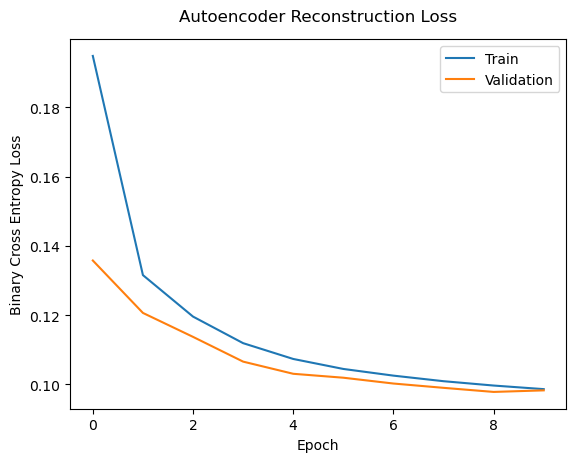

In [14]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Demonstrating my new encoding by showing the autencoder recreate a random set of digits and my new character

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


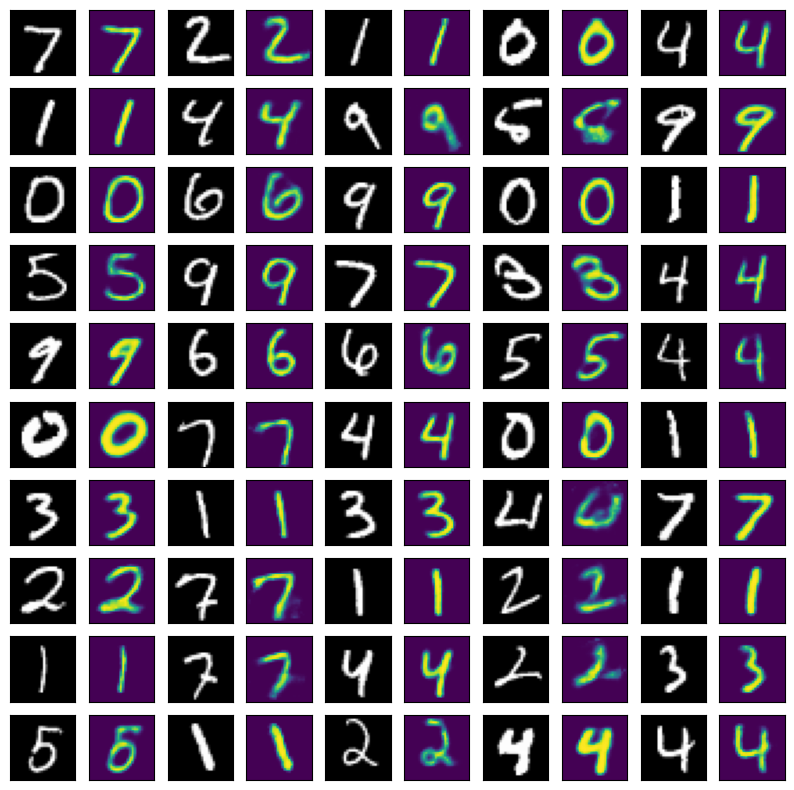

In [15]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [16]:
from tensorflow.keras.preprocessing import image

In [17]:
# load 5 sample images
images = []
for i in range(5):
    img_path = f's{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)

In [18]:
# predict an image from this sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = autoencoder.predict(input_arrs)
print(predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(5, 784)


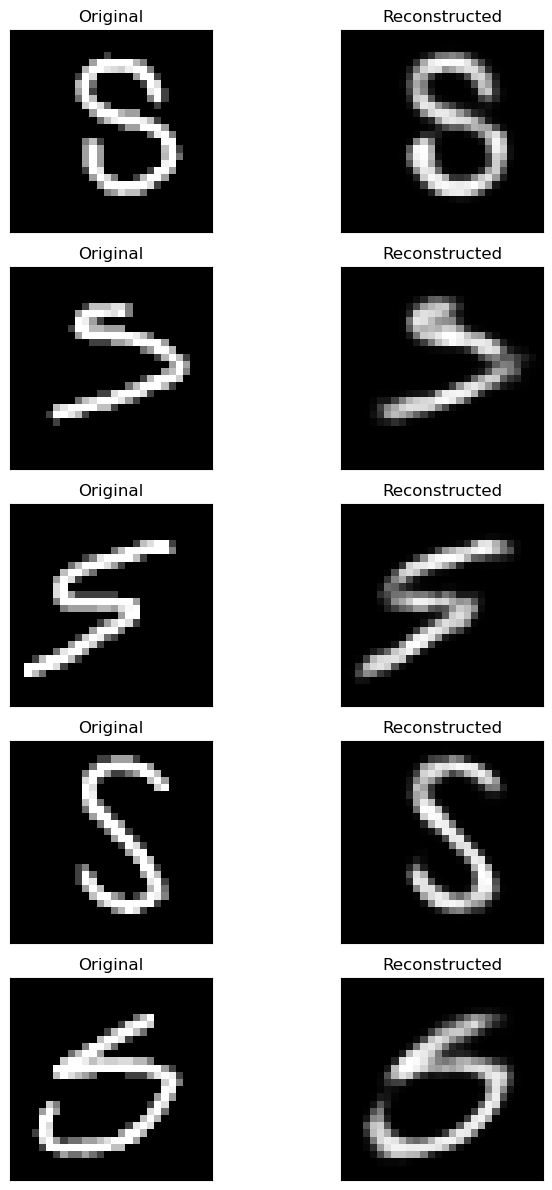

In [19]:
# display the two images side by side
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

### Save the autoencoder for later use.

A saved version of my trained autoencoder 

In [20]:
autoencoder.save('updated_autoencoder.h5')

# ANALYSIS 

The new autoencoder has also demonstrated effective learning, which was trained using the combined dataset (MNIST + new images). The loss shows a decrease with epochs, suggesting that the model is getting better at reconstructing the new character as well as MNIST digits.

The outcome Reconstructed images match original photos, indicating that the model is successfully identifying new characters. The new autoencoder's reconstruction results demonstrate its ability to successfully recreate the new character as well as MNIST digits. This illustrates how well the oversampling method that was employed to incorporate the additional photos into the dataset worked and shows how the model can generalize to new characters.

While we are doing this, i.e. adding new data to the existing data and training the model on this, making sure that the issue of "forgetting" the original digits while "remembering" the new ones (catastrophic forgetting) does not occur is necessary if we want the model to remember both the original and new characters.

The autoencoder has been saved as 'updated_autoencoder.h5' for future use.